In [55]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [56]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ef9b4d6d887c4ac6ac6efc791c6d58c0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ANOiTIKI-O_D8DN28xNB-u2vOMCp9JvNwZnkq5EL_uPm',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_ef9b4d6d887c4ac6ac6efc791c6d58c0.get_object(Bucket='covid19project-donotdelete-pr-jwjvzvkgawewfv',Key='covid_19_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [57]:
indData = pd.DataFrame(0, index=np.arange(111), columns=['cases','deaths','recovered'])

In [58]:
indData['deaths'] = df.loc[df["Country/Region"]=="India"].reset_index()['Deaths']
indData['cases'] = df.loc[df["Country/Region"]=="India"].reset_index()['Confirmed']
indData['recovered'] = df.loc[df["Country/Region"]=="India"].reset_index()['Recovered']

In [59]:
indData.head()

,cases,deaths,recovered
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,2.0,0.0,0.0
4,3.0,0.0,0.0


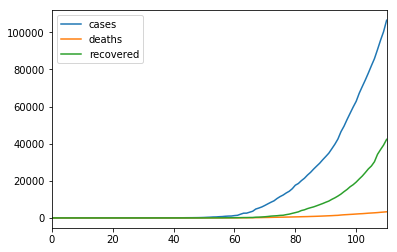

In [60]:
indData.plot()

In [65]:
idx = []
for i in indData.index:
    idx.append(i)

In [66]:
indData['idx'] = idx

In [67]:
indData.head()

,cases,deaths,recovered,idx
0,1.0,0.0,0.0,0
1,1.0,0.0,0.0,1
2,1.0,0.0,0.0,2
3,2.0,0.0,0.0,3
4,3.0,0.0,0.0,4


In [68]:
X = indData.iloc[:,3:4].values

In [69]:
y = indData.iloc[:,:3].values

In [70]:
X_train=X[:80]
y_train=y[:80]

In [71]:
X_test=X[80:]
y_test=y[80:]

In [72]:
poly_reg = PolynomialFeatures(degree=4)

In [73]:
X_poly = poly_reg.fit_transform(X)

In [74]:
poly_reg.fit(X_poly, y)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [75]:
lin_reg = LinearRegression()

In [76]:
lin_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
lin_reg.score(X_poly, y)

0.9994273923751847

In [78]:
pred =[]

In [79]:
for i in range(121,183):
    l =np.array([[i]])
    x =lin_reg.predict(poly_reg.fit_transform(l))
    pred.append(x[0])

In [80]:
pred= np.stack(pred,axis=0)

In [81]:
data = pd.date_range('5/31/20', periods = 62, freq ='D')

In [82]:
predict = pd.DataFrame(pred,index=data,columns=["P_Confirmed","P_Deaths","P_Recovered"])

In [83]:
print(predict)

             P_Confirmed      P_Deaths    P_Recovered
2020-05-31  1.750669e+05   5465.738372   76126.502838
2020-06-01  1.827122e+05   5695.001037   80234.467370
2020-06-02  1.906026e+05   5931.213471   84501.895684
2020-06-03  1.987432e+05   6174.511218   88932.743049
2020-06-04  2.071392e+05   6425.031101   93531.011833
2020-06-05  2.157957e+05   6682.911221   98300.751506
2020-06-06  2.247182e+05   6948.290955  103246.058633
2020-06-07  2.339119e+05   7221.310959  108371.076881
2020-06-08  2.433822e+05   7502.113165  113679.997015
2020-06-09  2.531347e+05   7790.840783  119177.056900
2020-06-10  2.631746e+05   8087.638301  124866.541500
2020-06-11  2.735077e+05   8392.651482  130752.782877
2020-06-12  2.841396e+05   8706.027368  136840.160193
2020-06-13  2.950758e+05   9027.914280  143133.099710
2020-06-14  3.063221e+05   9358.461814  149636.074788
2020-06-15  3.178842e+05   9697.820844  156353.605887
2020-06-16  3.297680e+05  10046.143521  163290.260564
2020-06-17  3.419793e+05  10

In [84]:
l15 =np.array([[126]])

In [85]:
x = lin_reg.predict(poly_reg.fit_transform(l15))

In [86]:
death_rate = (x[0][1]/x[0][0])*100

In [87]:
recover_rate = (x[0][2]/x[0][0])*100

In [88]:
print("Predicted death rate on 15th june: ",death_rate)
print("Predicted recovery rate on 15th june: ",recover_rate)

Predicted death rate on 15th june:  3.096869115065035
Predicted recovery rate on 15th june:  45.552686735976216


In [89]:
l =np.array([[183]])

In [90]:
x =lin_reg.predict(poly_reg.fit_transform(l))

In [91]:
death_rate = (x[0][1]/x[0][0])*100
recover_rate = (x[0][2]/x[0][0])*100

In [92]:
print("Predicted death rate on 31st july: ",death_rate)
print("Predicted recovery rate on 31st july: ",recover_rate)

Predicted death rate on 31st july:  2.8941868595998854
Predicted recovery rate on 31st july:  60.50458923031762
